# Biased Memory Toolbox (example)

First import all relevant libraries.

In [1]:
import biased_memory_toolbox as bmt
from datamatrix import io, operations as ops, DataMatrix
import numpy as np
from matplotlib import pyplot as plt

Read in a data file as a DataMatrix. There should be a column that contains
the memoranda (here: `hue1`) and a column that contains the responses (here:
`hue_response`), both in degrees with values between 0 and 360.

Next, we use the `response_bias()` function from `biased_memory_toolbox`
(imported as `bmt`) to calculate the `response bias`, which is the response
error in the direction of the category prototype. We use the default categories
as defined in the toolbox.

In [2]:
dm = io.readtxt('data_setsize.csv')
dm.response_bias = bmt.response_bias(
    dm.hue1,
    dm.hue_response,
    bmt.DEFAULT_CATEGORIES
)

Next, we loop through all participants, and for each participant separately
fit a mixture model to `response_bias`, resulting in a precision, guess rate,
and bias. This is done with `bmt.fit_mixture_model()`.

We also check whether participants responded above chance. This is done by
`bmt.test_chance_performance()`.

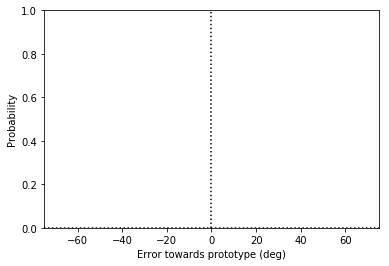

In [3]:
# Initialize an empty DataMatrix that will contain the fit results for each
# participant.
sm = DataMatrix(dm.sessionid.count)
sm.precision1 = -1
sm.guess_rate1 = -1
sm.bias1 = -1
sm.precision2 = -1
sm.guess_rate2 = -1
sm.bias2 = -1
sm.precision3 = -1
sm.guess_rate3 = -1
sm.bias3 = -1
sm.precision4 = -1
sm.guess_rate4 = -1
sm.bias4 = -1
sm.sessionid = -1
sm.p_chance = -1

# Intialize a plot that will contain the fits for individual participants.
plt.xlim(-75, 75)
plt.xlabel('Error towards prototype (deg)')
plt.ylabel('Probability')
plt.axvline(0, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
# Split the DataMatrix (dm) based on session id, such that we loop through the
# data for each participant separately (as sdm).
for row, (sessionid, sdm) in zip(sm, ops.split(dm.sessionid)):
    row.sessionid = sessionid
    sdm1, sdm2, sdm3, sdm4 = ops.split(sdm.set_size, 1, 2, 3, 4)
    # Fit the mixture model and assign the parameters to the row of `sm`.
    row.precision1, row.guess_rate1, row.bias1 = bmt.fit_mixture_model(sdm1.response_bias)
    row.precision2, row.guess_rate2, row.bias2 = bmt.fit_mixture_model(sdm2.response_bias)
    row.precision3, row.guess_rate3, row.bias3 = bmt.fit_mixture_model(sdm3.response_bias)
    row.precision4, row.guess_rate4, row.bias4 = bmt.fit_mixture_model(sdm4.response_bias)
    # Test chance performance. The first return value is the t value, which we
    # don't use. The second return value is the p value, which we assign to
    # the row of `sm`.
    _, row.p_chance = bmt.test_chance_performance(
        sdm.hue1,
        sdm.hue_response    
    )
    # Plot the model results for the participant.
#     x = np.linspace(-180, 180, 100)
#     y = bmt.mixture_model_pdf(x, row.precision, row.guess_rate, row.bias)
#     plt.plot(x, y)
io.writetxt(sm, 'mixture-model-results.csv')

Show the results!

In [4]:
sm

bias1,bias2,bias3,bias4,guess_rate1,guess_rate2,guess_rate3,guess_rate4,p_chance,precision1,precision2,precision3,precision4,sessionid
-0.9460672628557069,8.269510679348883,8.60046859545253,12.70820739575051,0.04686988313979881,0,0.08047566600147749,0.004591074490522881,1.15235450212522e-61,2818.0039879838437,303.95336969321704,792.0089372980393,247.24183281089614,1585729859935
2.1287311575298147,7.920521773949314,1.7187828815733273,12.263514231340062,0.09419266051873641,0.10416348439631501,0,0.25412892379769103,1.6844353726643432e-43,1816.8507064666069,636.0631377118656,308.6897516429187,499.8635181657669,1585737073858
-3.486473628365824,1.53505017254622,2.1056420290153275,4.552434316414197,0,0,0,0,1.8132274494923184e-37,1240.3025931831305,575.5892052365897,380.85122927103663,400.04181205953495,1585743098923
1.08740943596384,6.130702645733555,4.4401626008608375,2.032465687166815,0,0,0.32480680927187094,0.18360881968470324,1.8725100924047852e-18,2691.9262065360167,376.45050495273784,1357.9643388037896,695.7421589186594,1585913928047
-0.029247406581851838,-3.096582550063124,-1.0304132093795426,-5.179268347504918,0.2729407653712122,0.5090219691336528,0.34172735535698257,0.6412228785720548,2.738840275550518e-15,1447.6656549132927,1526.4934786701147,1008.8034875041718,2514.3069758135894,1586163908761
-1.7571624804676333,-0.22955146607847113,3.4986886663431567,7.636425084543199,0,0.0777551155287242,0.20972555608397006,0.11457597916726835,1.075540233768709e-40,687.1094378577098,616.3738979052712,660.561068534246,529.2064420569184,1586166725331
0.8746670569026826,0.006222856816050209,3.399324659775108,5.326798689570843,0.05971785469869258,0.05442785130377287,0.2924791707449179,0.08274812401169025,5.122246791790861e-46,2505.3968895061466,620.4035180161517,2409.4845286883547,548.0953476372077,1586171754629
0.5663179628019479,14.6810202417274,-4.225196861332582,6.211231071026694,0.5515082388154552,0.7555215668031879,0.6466223256462097,0.7663071413343426,1.0721666186313733e-09,1153.6141516718385,1920.8866507828557,2361.428891393091,2575.069799191468,1586195085500
-2.3396162485921916,0.4746341395455651,1.4462827384316532,8.843309584192268,0,0.0690148346779106,0,0.09734683776372974,2.5397826889815906e-31,1976.980933184316,1555.4119007475404,655.940116591561,865.3256866428684,1586254696064
-2.2860648084644986,2.287547011347218,7.019451245089631,3.750169165296238,0.0630986034148379,0.2266670360493615,0.09356408522548172,0.17111747169150934,7.480807291060992e-52,1531.6564315826047,821.8492903262755,500.12931663758707,754.6876822569744,1586265521442
